## Day 9: Solving Linear Programming Problems with PuLP
Linear programming problems can be solved using a variety of tools. Today, we introduce PuLP—a Python library that lets you define decision variables, set up objective functions, and impose constraints in a clear, human‐readable way. Unlike the previous lesson where we used SciPy’s linprog, PuLP gives you a more flexible and intuitive modeling interface.

### Problem Statement
A factory produces two products, A and B. The goal is to maximize profit given the following information:

#### Profit per unit:

Product A: $5

Product B: $4

#### Resource requirements:

Each unit of product A requires 2 hours of machine time and 3 hours of labor.

Each unit of product B requires 3 hours of machine time and 2 hours of labor.

#### Resource availability:

Machine time: 60 hours

Labor: 60 hours

Nonnegativity: 

x≥0 and y≥0, where x and y represent the number of units produced for products A and B, respectively.

#### The objective is to maximize profit:

P(x,y)=5x+4y,

subject to the constraints:

Machine time: 

2x+3y≤60

Labor: 

3x+2y≤60

Nonnegativity: 

x,y≥0

Since PuLP supports maximization directly, we will set up the problem as a maximization.

In [7]:
# Import pulp and create a problem instance

import pulp as pl

problem = pl.LpProblem("Factory_Profit_Maximization", pl.LpMaximize)

In [8]:
# Define the decision variables

x = pl.LpVariable("x", lowBound=0) # Units of product A
y = pl.LpVariable("y", lowBound=0) # Units of product B

In [9]:
# Define the objective function to maximize

problem += 5*x + 4*y, "Total Profit"

In [10]:
# Define constraints

problem += 2*x + 3*y <= 60, "Machine_Time"

problem += 3*x + 2*y <= 60, "Labor"

In [11]:
problem.solve()

optimal_x = pl.value(x)
optimal_y = pl.value(y)
optimal_profit = pl.value(problem.objective)

print("Optimal solution: x=", optimal_x, "y=", optimal_y)
print("Maximum profit:", optimal_profit)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/max.howard/development/learning/optimization/env/lib/python3.13/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4_/zpvbqjvs2f3b5dpcg0lk0tsc0000gn/T/3ee997f49d414e05b4b3d4a6e4e5c5f3-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/4_/zpvbqjvs2f3b5dpcg0lk0tsc0000gn/T/3ee997f49d414e05b4b3d4a6e4e5c5f3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 8.9999998 (2)
0  Obj -0 Dual inf 8.9999998 (2)
2  Obj 108
Optimal - objective value 108
Optimal objective 108 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU sec

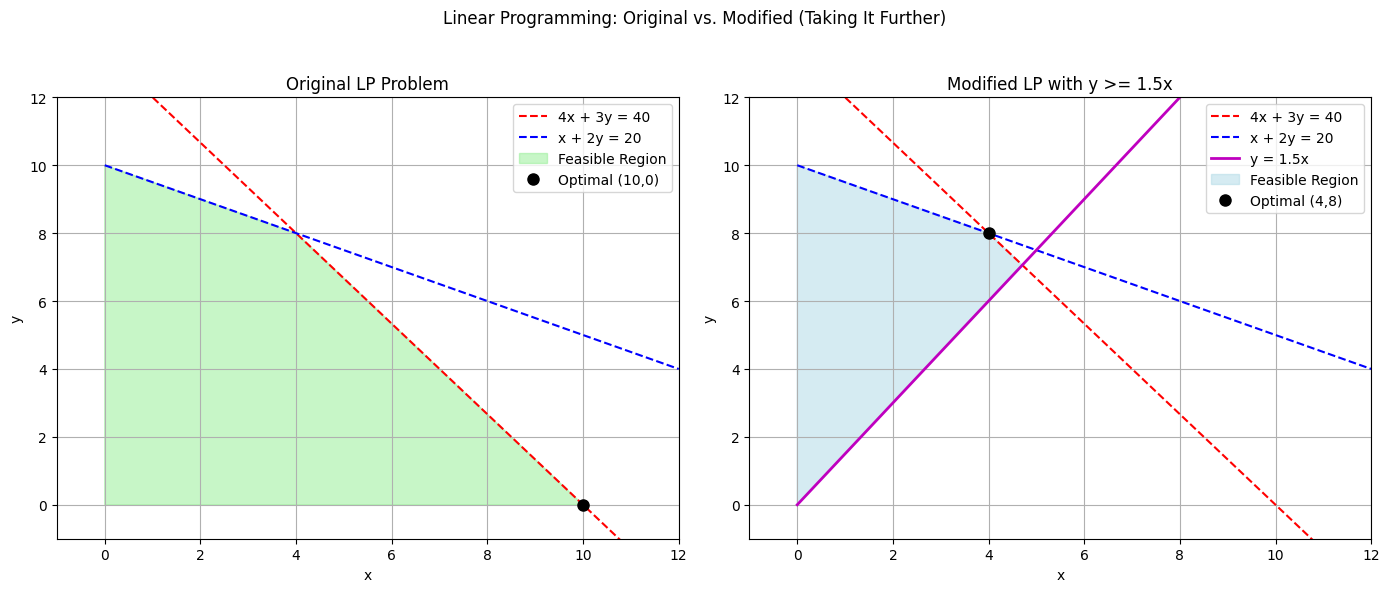

In [12]:
# Visualize the problem

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Left Subplot: Original LP
# -----------------------------
# Original LP Problem:
# Maximize profit P(x,y)=7x+5y
# Subject to:
#    4x + 3y <= 40
#    x + 2y <= 20
#    x, y >= 0
# (Optimal solution reported: (10, 0) with profit 70)

# Generate x values for plotting constraint lines
x_vals = np.linspace(0, 12, 300)

# Constraint 1: 4x+3y=40  =>  y = (40 - 4x)/3
y1 = (40 - 4*x_vals) / 3
# Constraint 2: x+2y=20  =>  y = (20 - x)/2
y2 = (20 - x_vals) / 2

# Create vertices for the feasible region manually.
# Feasible region vertices (by intersection of constraints):
#   Vertex A: Intersection of 4x+3y=40 and y=0  => x=10, y=0.
#   Vertex B: Intersection of 4x+3y=40 and x+2y=20  => (4,8).
#   Vertex C: Intersection of x+2y=20 and x=0  => x=0, y=10.
#   And include (0,0) to close the region.
vertices_orig = np.array([[0,0], [10,0], [4,8], [0,10]])

# -----------------------------
# Right Subplot: Modified LP
# -----------------------------
# Modified LP Problem (Taking It Further):
# Same as original but with additional constraint:
#    y >= 1.5x   (i.e. x and y must satisfy y - 1.5x >= 0)
# (Optimal solution reported: (4, 8) with profit 68)
#
# In the modified problem, (10,0) is no longer feasible because it violates y>=1.5x.
# The feasible region is reduced to the intersection of:
#    4x+3y <= 40,  x+2y <= 20,  y >= 1.5x, and x,y>=0.
#
# For simplicity, we approximate the polygon vertices for the modified region.
#   - (0,10) remains feasible.
#   - (4,8) lies on the intersection of 4x+3y=40 and x+2y=20.
#   - The boundary line of y=1.5x and the constraint 4x+3y=40 intersect near:
#         x = 40/(4+3*0.5) = 40/5.5 ≈ 7.27? Wait—that doesn’t match our reported optimum.
#
# Instead, based on the reported solution (4,8) being optimal, we note that (4,8) satisfies:
#    4x+3y = 4*4+3*8 = 16+24 = 40, and
#    x+2y = 4+16 = 20, and
#    y = 8 >= 1.5*4 = 6.
#
# To illustrate the effect of the new constraint, we plot the line y=1.5x.
#
# For the feasible region in the modified case, we use approximate vertices:
#   - Vertex D: (0,10)  (from x=0, x+2y=20)
#   - Vertex E: (4,8)   (intersection of 4x+3y=40 and x+2y=20)
#   - Vertex F: The intersection of y=1.5x with 4x+3y=40.
#       Solve 4x + 3*(1.5x) = 40 => 4x + 4.5x = 8.5x = 40 => x ≈ 4.7059, y ≈ 7.0588.
#   - Also include (0,0) to close the polygon (even though the extreme lower bound is less interesting).
vertices_mod = np.array([[0,0], [4.7059, 7.0588], [4,8], [0,10]])

# Create the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Linear Programming: Original vs. Modified (Taking It Further)")

# --- Plot for Original LP ---
ax = axs[0]
ax.set_title("Original LP Problem")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 12)
ax.grid(True)

# Plot constraint lines
ax.plot(x_vals, y1, 'r--', label="4x + 3y = 40")
ax.plot(x_vals, y2, 'b--', label="x + 2y = 20")
# Plot the feasible region polygon
poly_orig = plt.Polygon(vertices_orig, color='lightgreen', alpha=0.5, label="Feasible Region")
ax.add_patch(poly_orig)
# Mark the optimal solution (10,0)
ax.plot(10, 0, 'ko', markersize=8, label="Optimal (10,0)")
ax.legend(loc="upper right")

# --- Plot for Modified LP ---
ax2 = axs[1]
ax2.set_title("Modified LP with y >= 1.5x")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim(-1, 12)
ax2.set_ylim(-1, 12)
ax2.grid(True)

# Plot original constraint lines
ax2.plot(x_vals, y1, 'r--', label="4x + 3y = 40")
ax2.plot(x_vals, y2, 'b--', label="x + 2y = 20")
# Plot the additional constraint: y = 1.5x
ax2.plot(x_vals, 1.5*x_vals, 'm-', linewidth=2, label="y = 1.5x")
# Plot the modified feasible region polygon (approximate)
poly_mod = plt.Polygon(vertices_mod, color='lightblue', alpha=0.5, label="Feasible Region")
ax2.add_patch(poly_mod)
# Mark the new optimal solution (4,8)
ax2.plot(4, 8, 'ko', markersize=8, label="Optimal (4,8)")
ax2.legend(loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
